# Linear Regression 
###### Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities 
###### Both with and without sci-kit learn

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

in dataset both the column has values in multiple of 10k

### Reading the dataset

In [2]:
df = pd.read_csv('Data1.txt',names = ['Population_10000s', 'Profit_10000s'])

In [3]:
df=pd.read_table('Data1.txt', delimiter = ',',names = ['Population_10000s', 'Profit_10000s'])

In [4]:
df

,Population_10000s,Profit_10000s
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


### Scatter plot of Population vs Profit

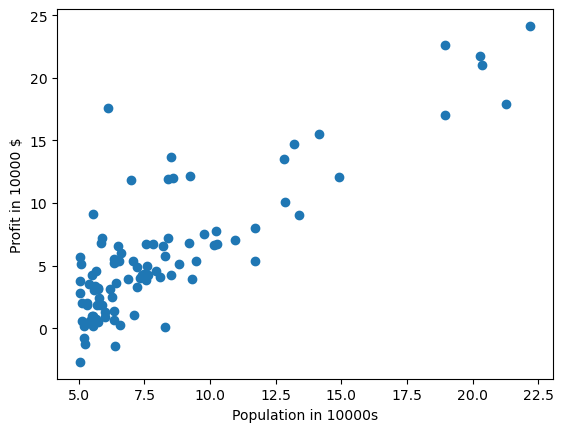

In [5]:
plt.scatter(df['Population_10000s'],df['Profit_10000s'])
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000 $')
plt.show()

### Function to compute the cost function 

In [6]:
### Function to compute the cost function 

In [7]:
def computeCost(x, y, theta):
    #MSE ka formula
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))


### Appending 1s to the front of the dataset

In [8]:
#insert column with 1s
a = []
a = np.ones(len(df)).tolist()
ones = pd.DataFrame(a)

df.insert (0, "ones", a)
print(df)

    ones  Population_10000s  Profit_10000s
0    1.0             6.1101       17.59200
1    1.0             5.5277        9.13020
2    1.0             8.5186       13.66200
3    1.0             7.0032       11.85400
4    1.0             5.8598        6.82330
..   ...                ...            ...
92   1.0             5.8707        7.20290
93   1.0             5.3054        1.98690
94   1.0             8.2934        0.14454
95   1.0            13.3940        9.05510
96   1.0             5.4369        0.61705

[97 rows x 3 columns]


### Set training data (X) and target variable (y)

In [48]:
x = df[['Population_10000s']]
y = df[['Profit_10000s']]

print(x)
print(y)

    Population_10000s
0              6.1101
1              5.5277
2              8.5186
3              7.0032
4              5.8598
..                ...
92             5.8707
93             5.3054
94             8.2934
95            13.3940
96             5.4369

[97 rows x 1 columns]
    Profit_10000s
0        17.59200
1         9.13020
2        13.66200
3        11.85400
4         6.82330
..            ...
92        7.20290
93        1.98690
94        0.14454
95        9.05510
96        0.61705

[97 rows x 1 columns]


### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [49]:
#converting X,y into numpy matrix

x_array = np.array(x.Population_10000s)
print("x_array = ", x_array)
print()
y_array = np.array(y.Profit_10000s)
print("y_array = ", y_array)

x_array =  [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]

y_array =  [17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.76

### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [84]:
def gradient_descent(x, y,iters,alpha):
    # initial value of m and b
    
    # m is the slope of best fit line, here it is the variable m_curr
    # b is the intercept of best fit line, here it is the variable b_curr
    m_curr = b_curr = 0
    
    # initialize number of steps
    iterations = iters
    
    # Number of data points n
    n = len(x)
    
    # Initialize learning rate
    learning_rate = alpha
    
    cost_previous = 0
    c = []
    for i in range(iterations):
        y_pred = m_curr * x + b_curr   #y=mx+b
        
        # this can be replaced by  a cost fucntion which does the exact same thing
        #cost = skm.mean_squared_error(y, y_pred)
        cost = (1/n) * sum([val**2 for val in (y-y_pred)]) #this is cost fucntion(MSE) but calculated manually
        
        md = -(2/n)*sum(x*(y-y_pred))
        bd = -(2/n)*sum(y-y_pred)
        
        m_curr = m_curr - learning_rate * md
        # print(m_curr)
        b_curr = b_curr - learning_rate * bd
        # print(b_curr)
         
        # if statement for loop to exit when current cost is very close to previous cost
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
            
        cost_previous = cost
        c.append(cost)
    print("m = {}, b = {}, cost = {}, i = {}".format(m_curr, b_curr, cost, i))
    return cost,m_curr, b_curr,c,i

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [96]:
alpha = 0.001 
iters = 100000

#alpha and number of iterations are already set in the gradient_descent fuction

In [97]:
cost,m,b,c,i = gradient_descent(x_array, y_array,iters,alpha)
print(i)

m = 1.1930327124787414, b = -3.8957716039439587, cost = 8.953942751966034, i = 35964
35964





### Using Matplotlib library to visualize our solution using scatter plot

In [98]:
y_pred_gd = []
for k in range(len(x_array)):
    x = x_array[k]
    y_pred_gd.append(x*m+b)

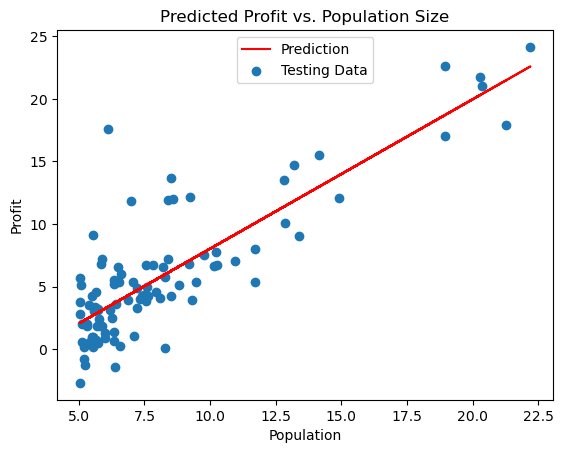

In [114]:
plt.plot(x_array, y_pred_gd, 'r', label='Prediction')

plt.scatter(x_array, y_array, label='Testing Data')
plt.xlabel('Population')  
plt.ylabel('Profit')  
plt.title('Predicted Profit vs. Population Size')
plt.legend(loc = 'upper center')

Text(0, 0.5, 'Cost')

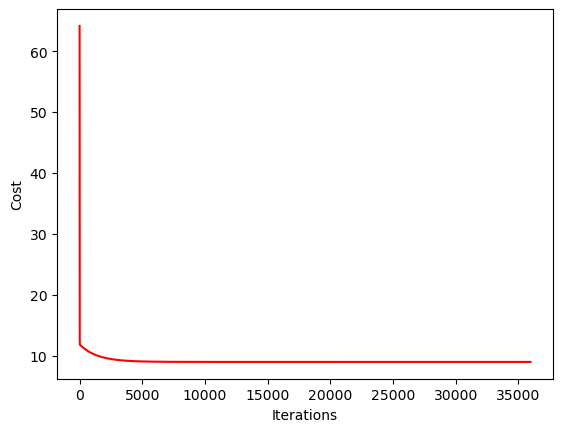

In [100]:
plt.plot(np.arange(i), c, 'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [101]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm

In [102]:
from sklearn.model_selection import train_test_split

x = df[['Population_10000s']]
y = df[['Profit_10000s']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 101)


print(f'Total # of sample in whole dataset: {len(x)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Shape of x_train: {x_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(x_test)}')
print(f'Shape of x_test: {x_test.shape}')

Total # of sample in whole dataset: 97
**************************************************
Total # of sample in train dataset: 64
Shape of x_train: (64, 1)
**************************************************
Total # of sample in test dataset: 33
Shape of x_test: (33, 1)


In [103]:
#fit the model
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [104]:
#predict the target values
y_pred = regressor.predict(x_test)

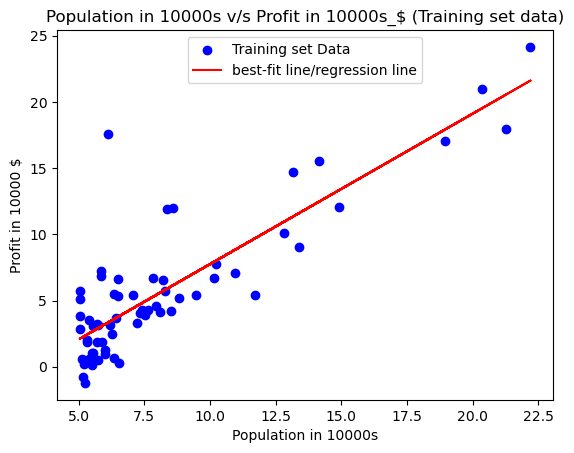

In [105]:
plt.scatter(x_train, y_train, color = 'blue',label = 'Training set Data')
plt.plot(x_train, regressor.predict(x_train) , color = 'red',label = 'best-fit line/regression line')
plt.title('Population in 10000s v/s Profit in 10000s_$ (Training set data)')
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000 $')
plt.legend(loc = 'upper center')
plt.show()

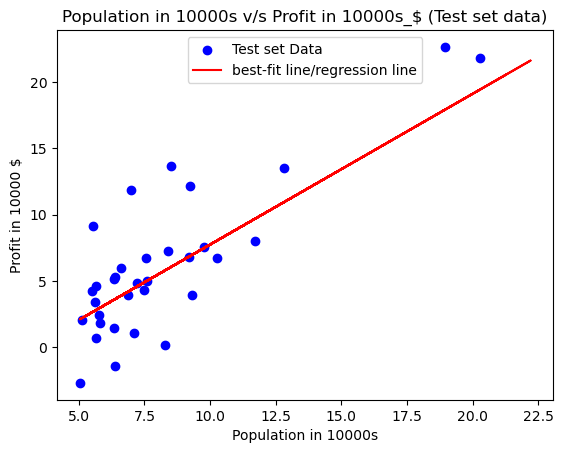

In [106]:
plt.scatter(x_test, y_test, color = 'blue',label = 'Test set Data')
plt.plot(x_train, regressor.predict(x_train) , color = 'red',label = 'best-fit line/regression line')
plt.title('Population in 10000s v/s Profit in 10000s_$ (Test set data)')
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000 $')
plt.legend(loc = 'upper center')
plt.show()

#### evalute the model

In [107]:
MAE = skm.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",MAE)

Mean Absolute Error: 2.4583355713550614


In [108]:
MAPE = np.mean(np.abs( (y_test-y_pred) / y_test ))*100
print("Mean Absolute Percentage Error:",np.mean(np.abs( (y_test-y_pred) / y_test))*100)
print("Mean Absolute Percentage Error: ",MAPE)

Mean Absolute Percentage Error: Profit_10000s    181.008898
dtype: float64
Mean Absolute Percentage Error:  Profit_10000s    181.008898
dtype: float64


C:\Users\Yash Thakar\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [109]:
MSE = skm.mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",MSE)

Mean Squared Error:  10.76583715075204


In [110]:
RMSE = np.sqrt(skm.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",RMSE)

Root Mean Squared Error: 3.2811335161422552


In [111]:
R2 = skm.r2_score(y_test, y_pred)
print("R^2: ",R2)

n=x_test.shape[0]
p=x_test.shape[1] - 1   # subtract 1 coz test.shape also includes attribute we have to predict

adj_R2 = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: ',adj_R2)

R^2:  0.6585859672651708
Adjusted R Squared:  0.6585859672651708


In [112]:
results = [MSE, RMSE, MAE, MAPE, R2, adj_R2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_R2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,10.765837
1,RMSE,3.281134
2,MAE,2.458336
3,MAPE,Profit_10000s 181.008898 dtype: float64
4,r2,0.658586
5,adj_R2,0.658586


The best metric for the evaluting model would be the MAE as it gives the score in the same unit as the attribute and is least affected by outliers